In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds


%matplotlib inline  

In [2]:
b1 = tsds.load_ozone()
df = b1.mPastData

     Month  Ozone       Time
0  1955-01    2.7 1955-01-01
1  1955-02    2.0 1955-02-01
2  1955-03    3.6 1955-03-01
3  1955-04    5.0 1955-04-01
4  1955-05    6.5 1955-05-01


In [3]:
b1.mHorizon

12

In [4]:

lEngine = autof.cForecastEngine()


INFO:pyaf.std:TRAINING_ENGINE_START {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}
INFO:pyaf.std:TRAINING_ENGINE_END 4.817
INFO:pyaf.std:TIME_DETAIL TimeVariable='Time' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Ozone' Length=204  Min=1.2 Max=8.7  Mean=3.835784 StdDev=1.491559
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Ozone' Min=0.0 Max=1.0  Mean=0.351438 StdDev=0.198875
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_LinearTrend_residue_Cycle_12_residue_NoAR' [LinearTrend + Cycle_12 + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Ozone_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Ozone_LinearTrend_residue_Cycle_12' [Cycle_12]
INFO:pyaf.std:AUTOREG_DETAIL '_Ozone_LinearTrend_residue_Cycle_12_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_PERFS Fit STEP=1 {'MAPE': 0.17

  Transformation DecompositionType  \
0         _Ozone             T+S+R   
1         _Ozone             T+S+R   

                                               Model    Voting Complexity  \
0   _Ozone_LinearTrend_residue_Cycle_12_residue_NoAR  609.8333      SSSSS   
1  _Ozone_LinearTrend_residue_Seasonal_MonthOfYea...  609.8333      SSSSS   

   Forecast_MASE_1  Forecast_MASE_H  
0           0.7396           0.7396  
1           0.7396           0.7396  


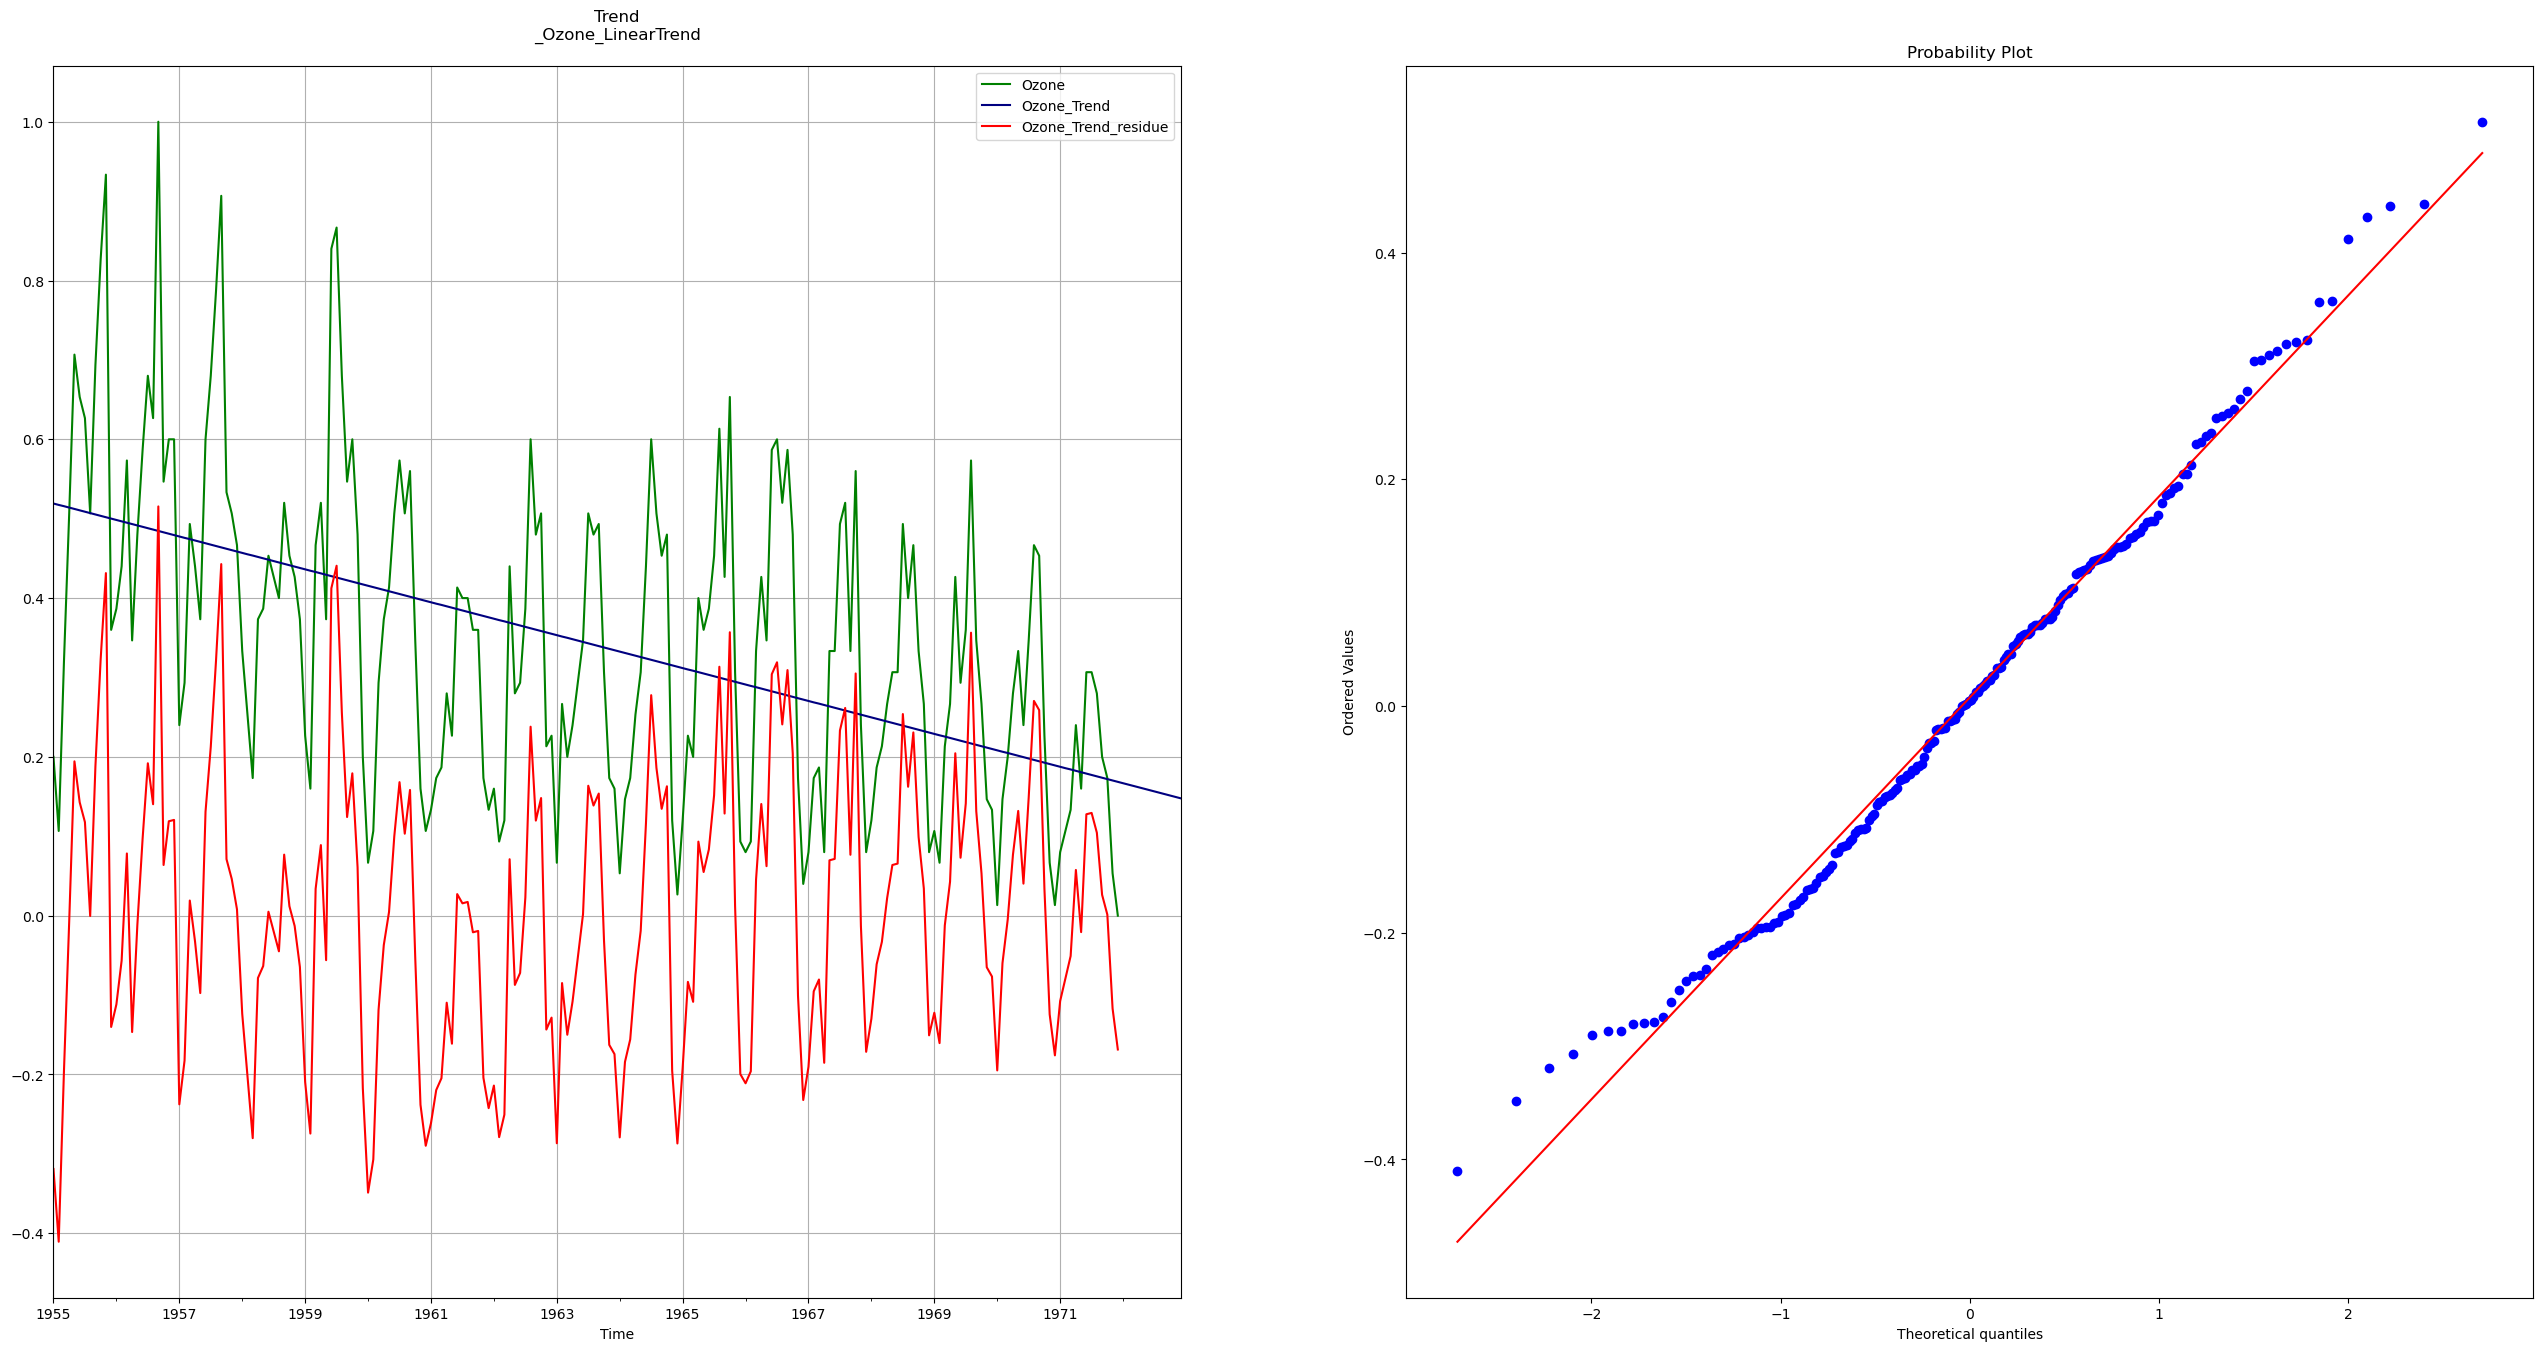

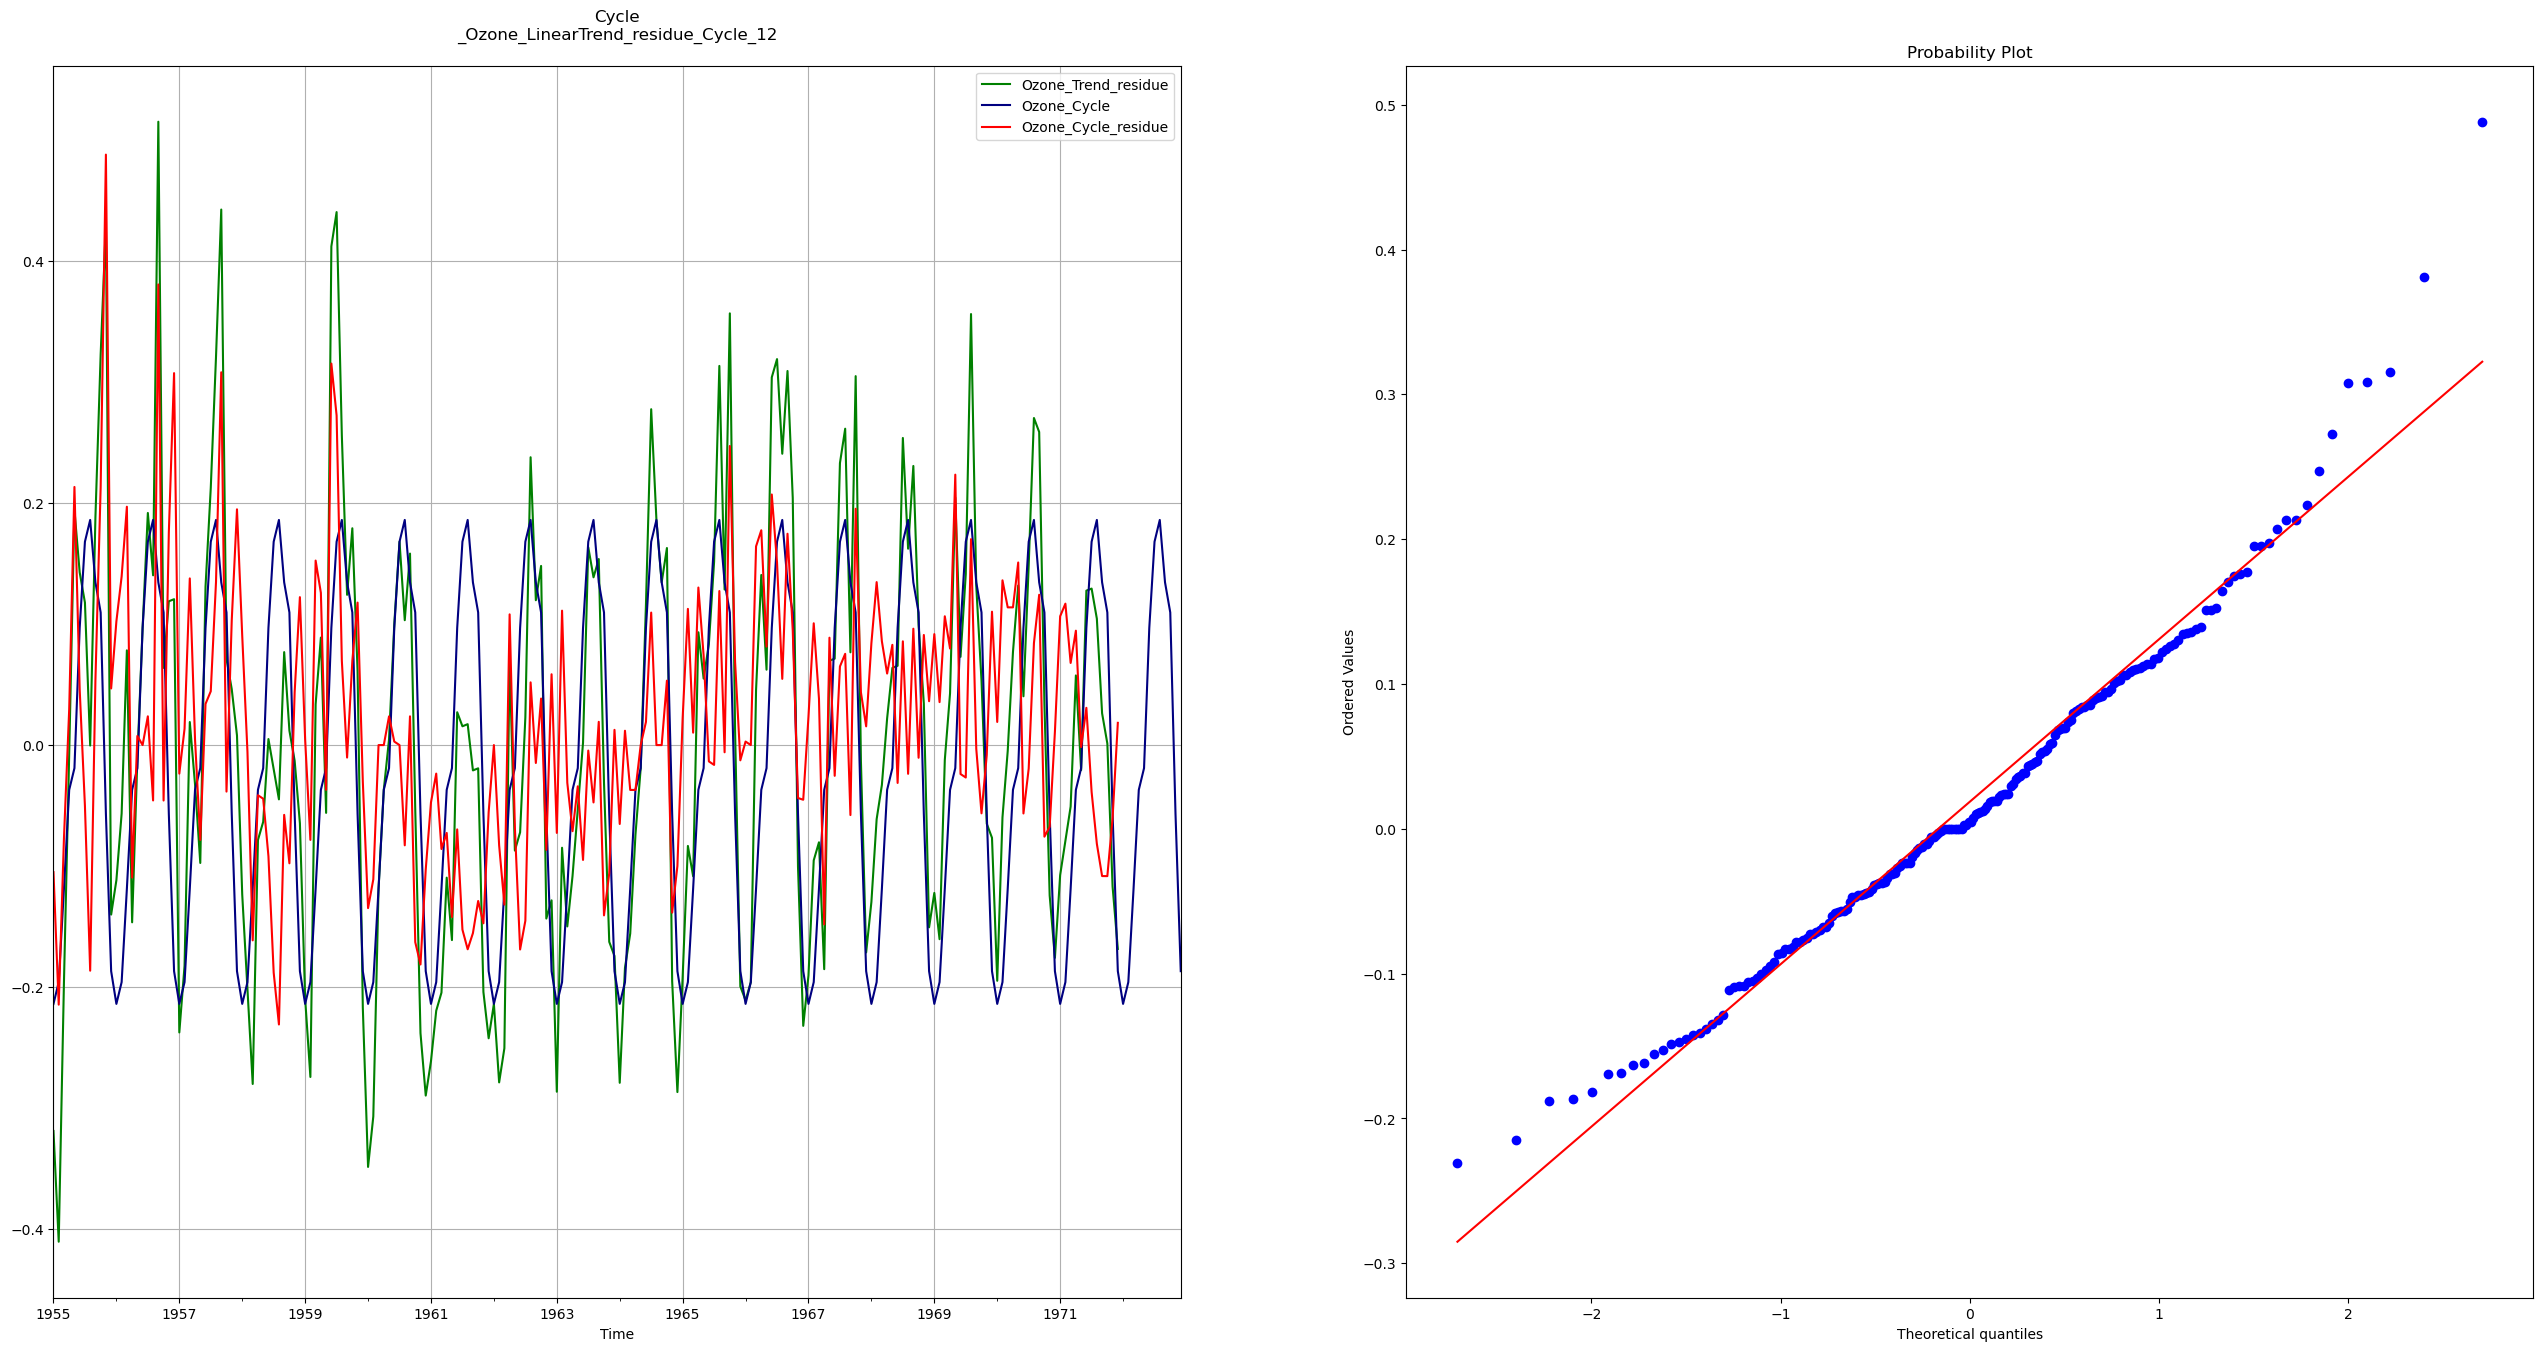

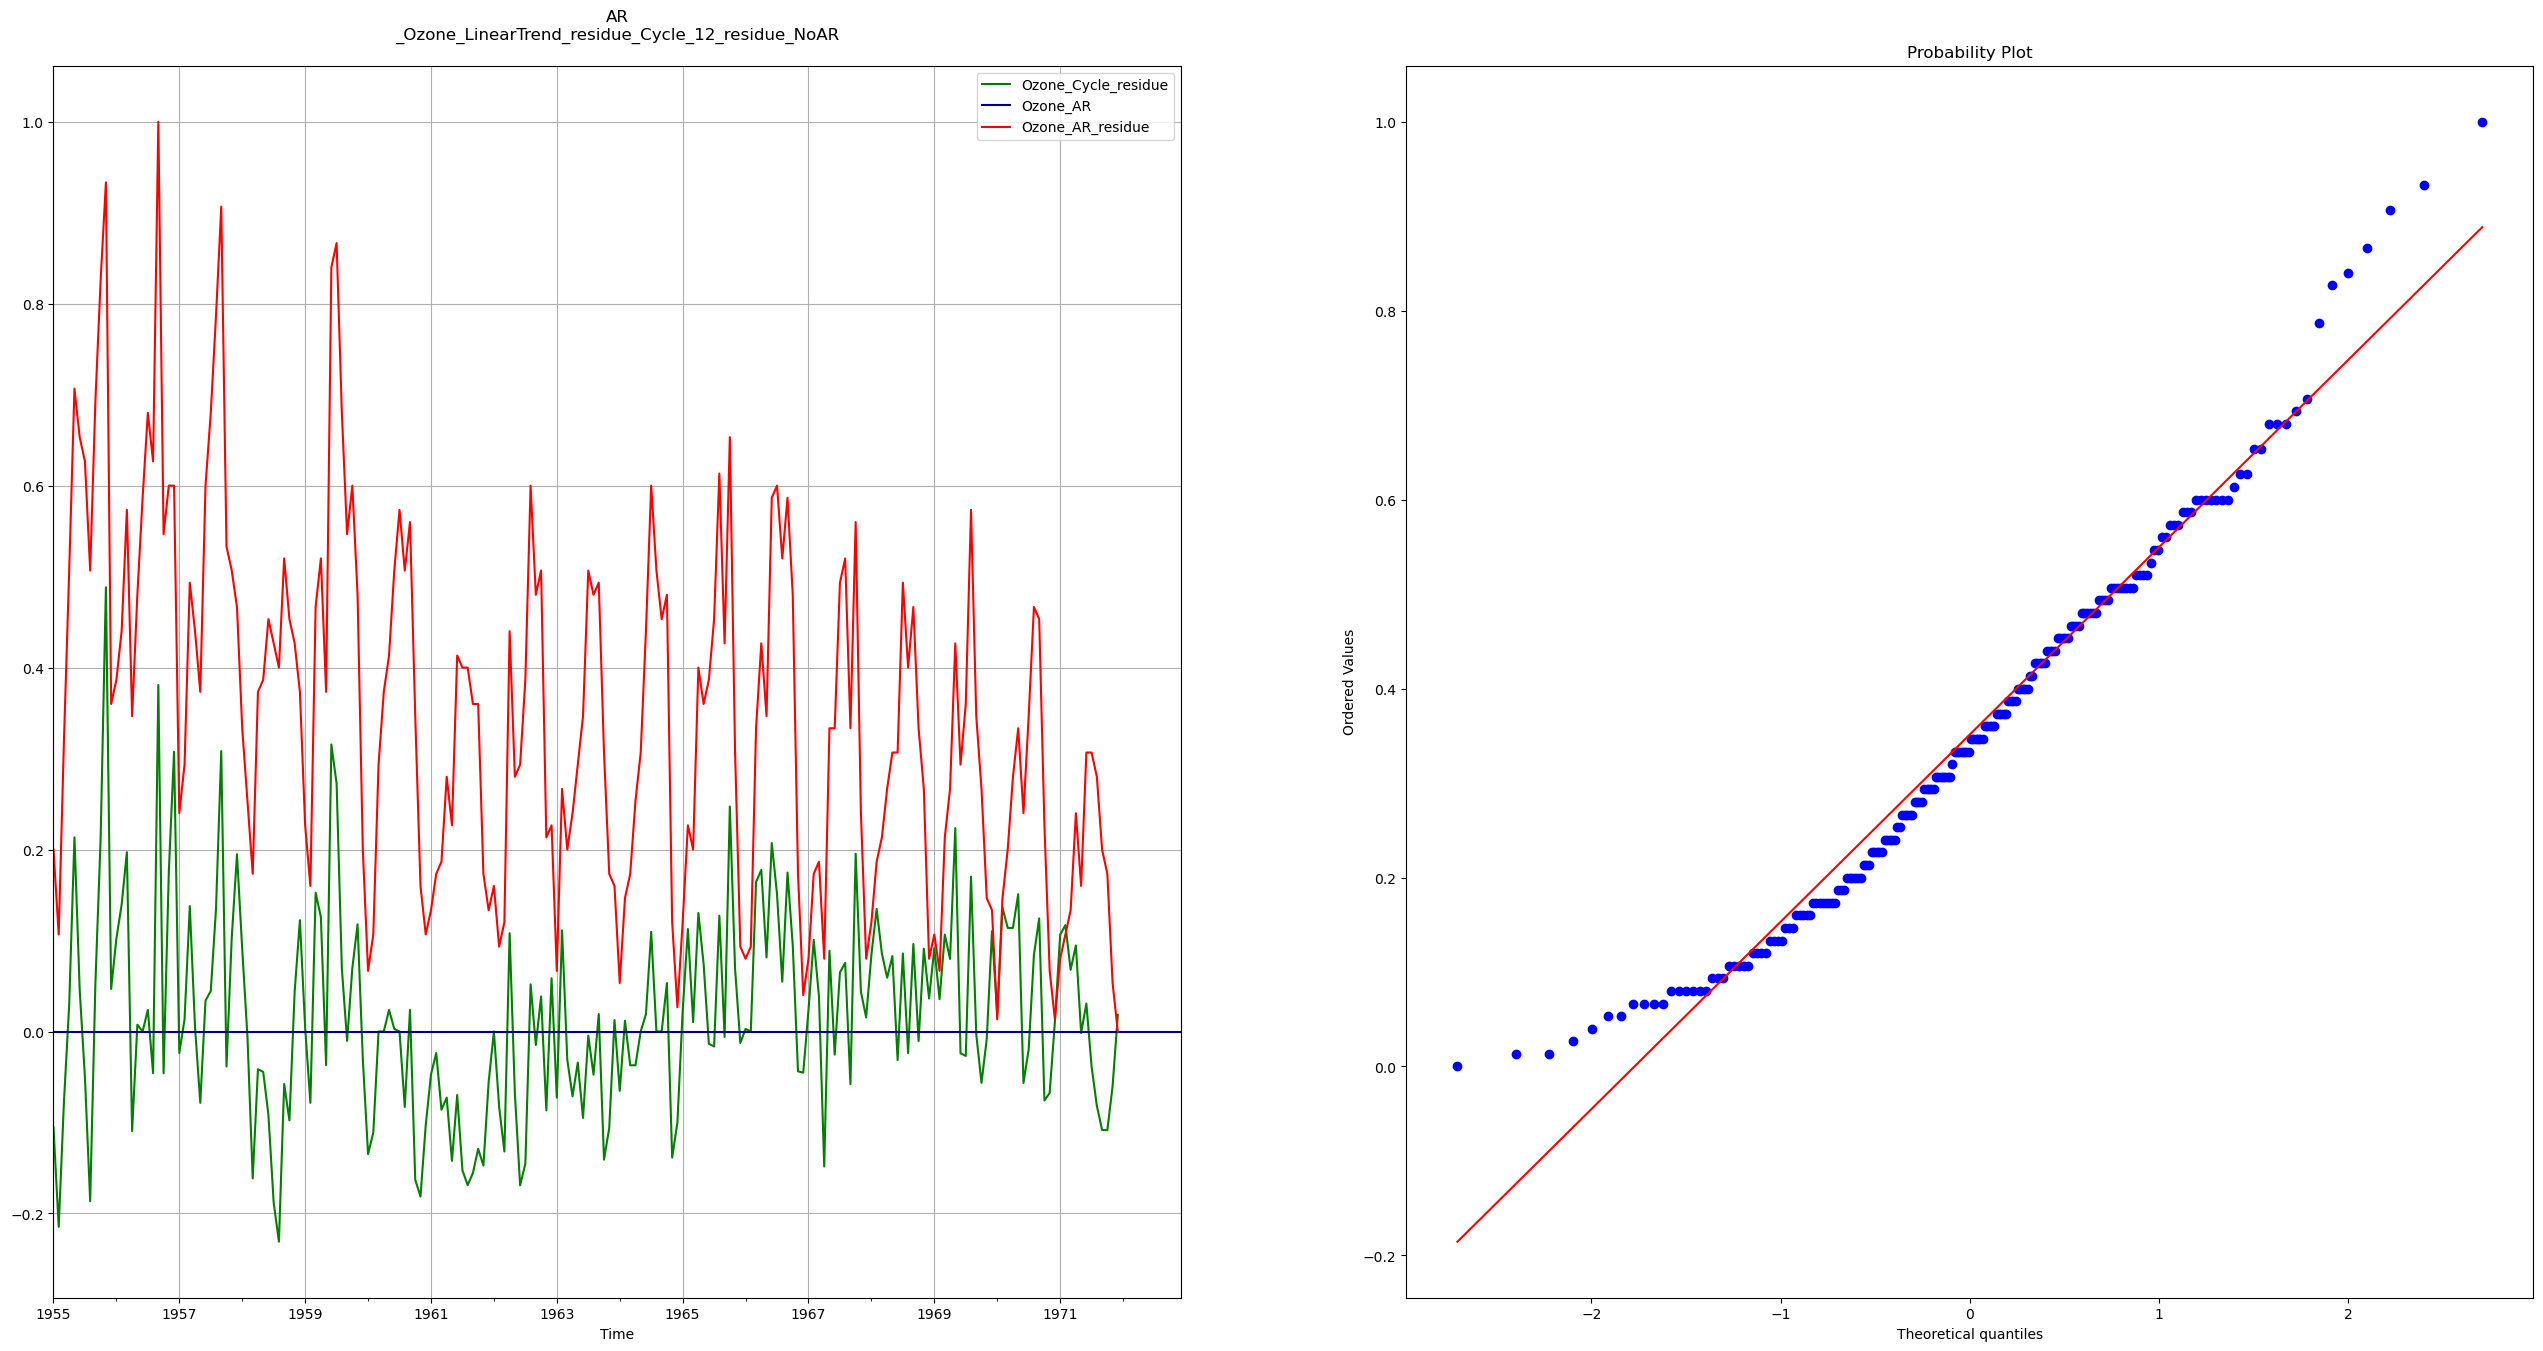

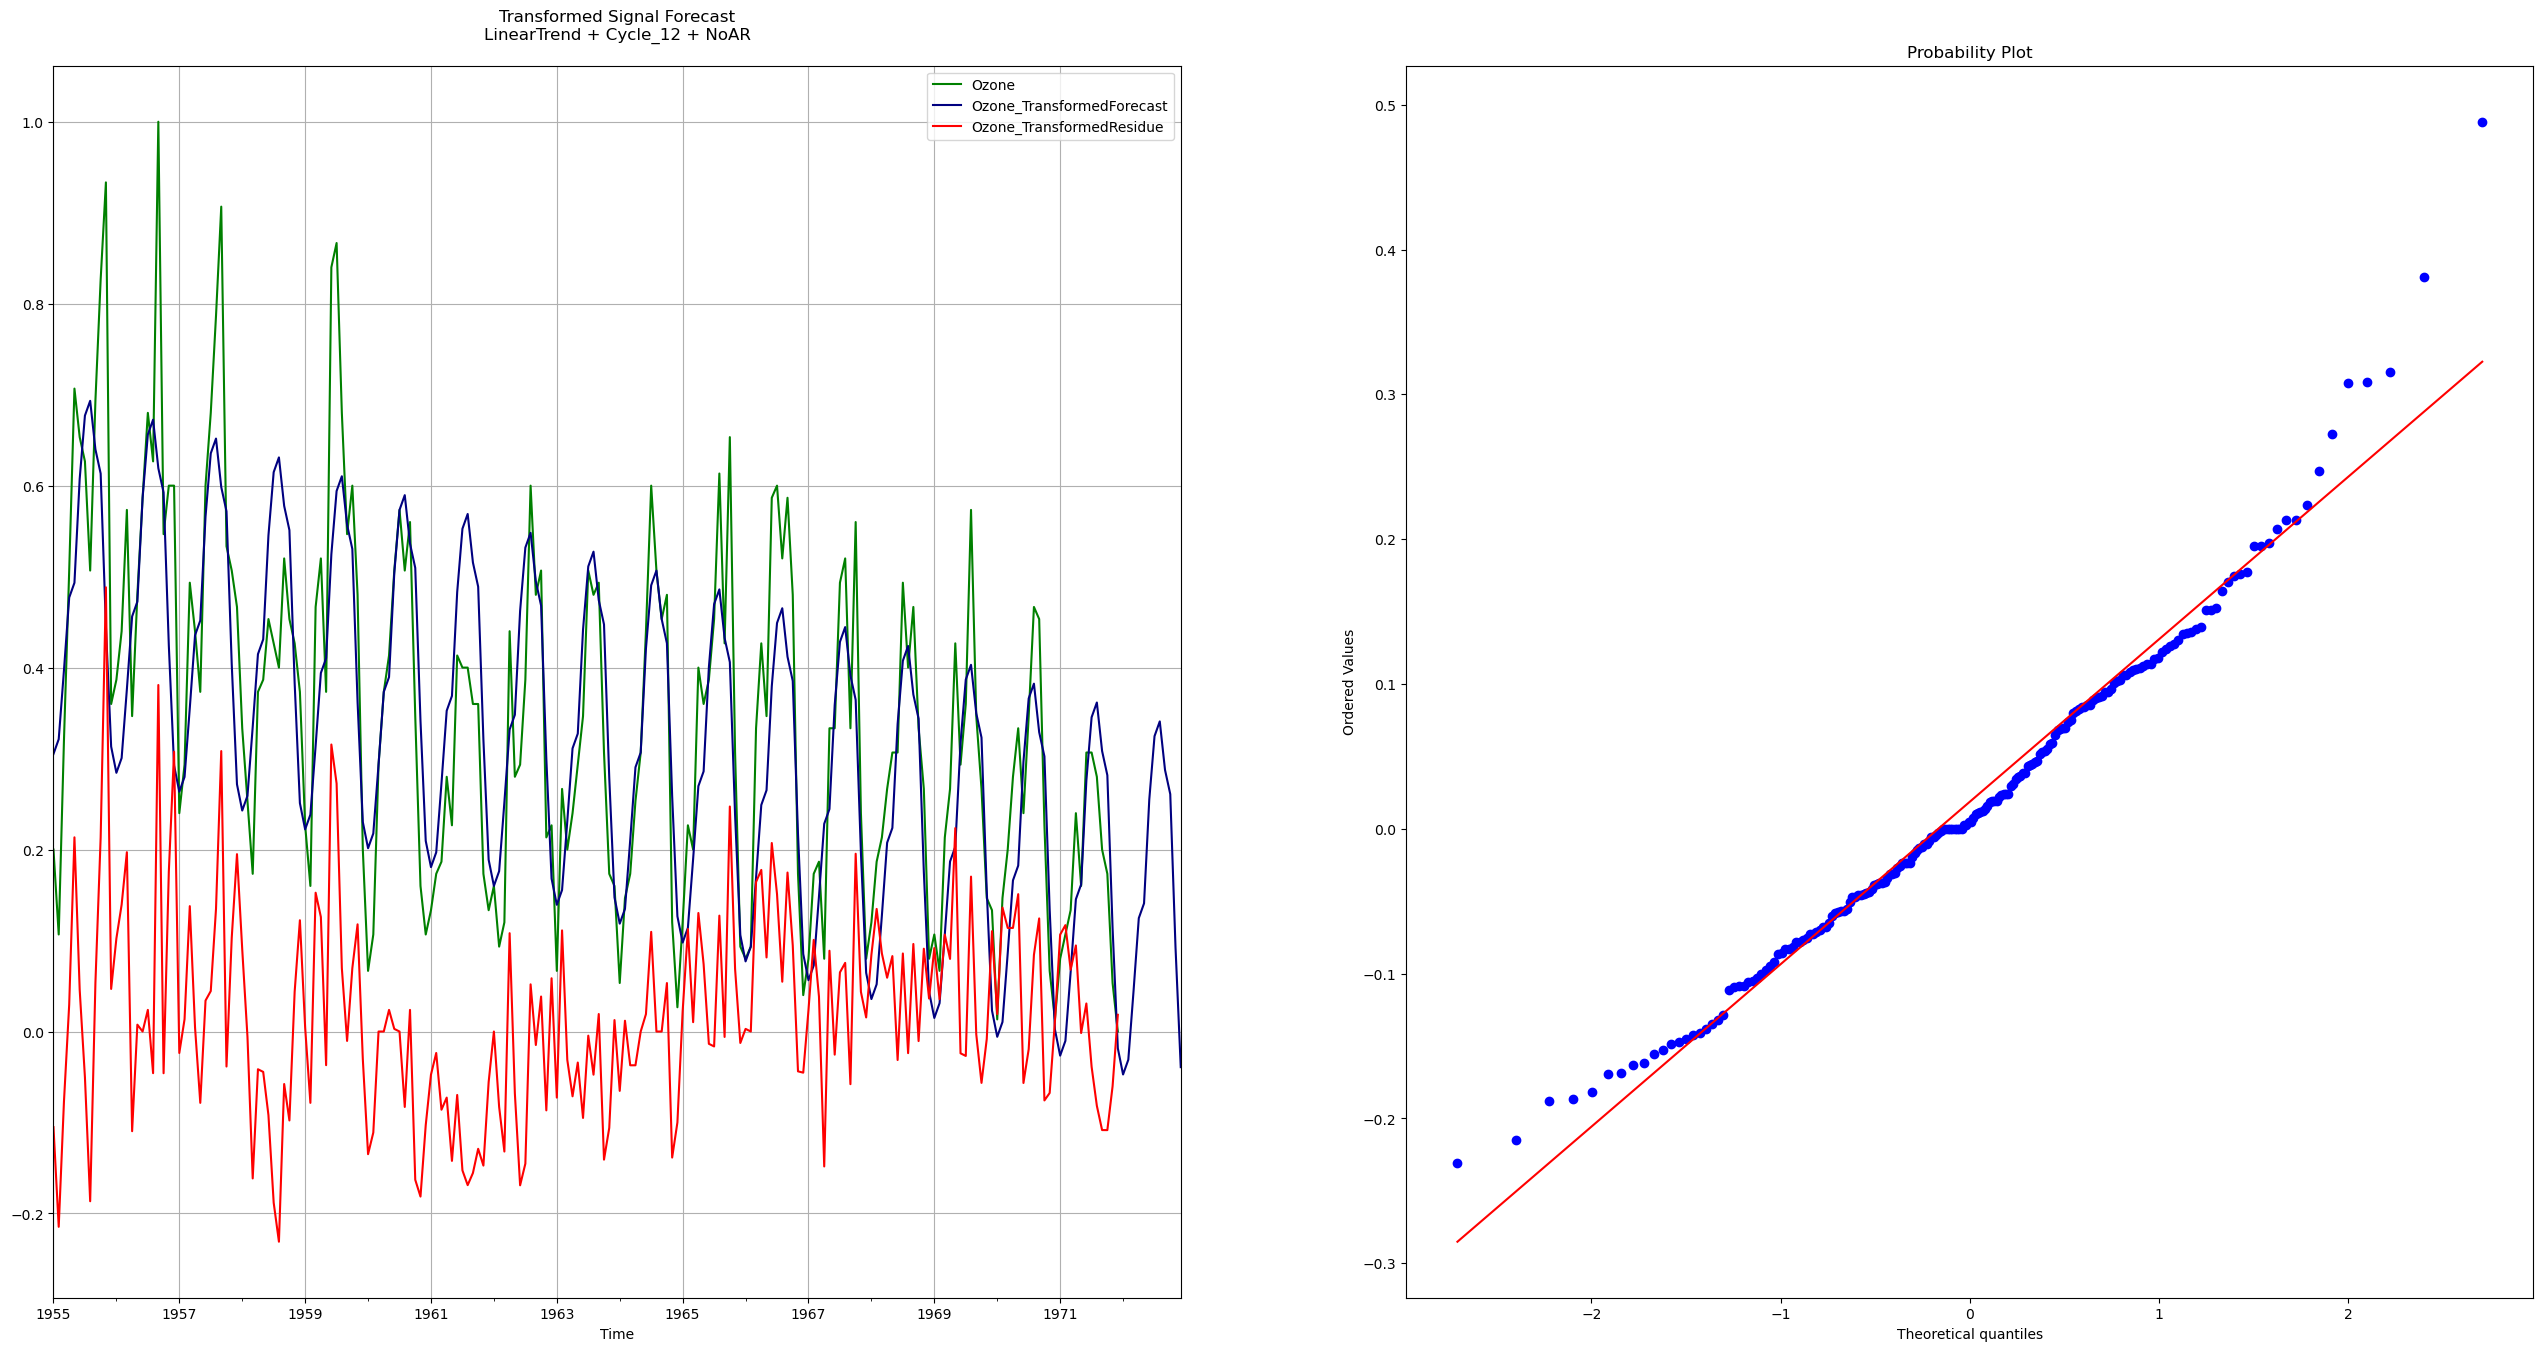

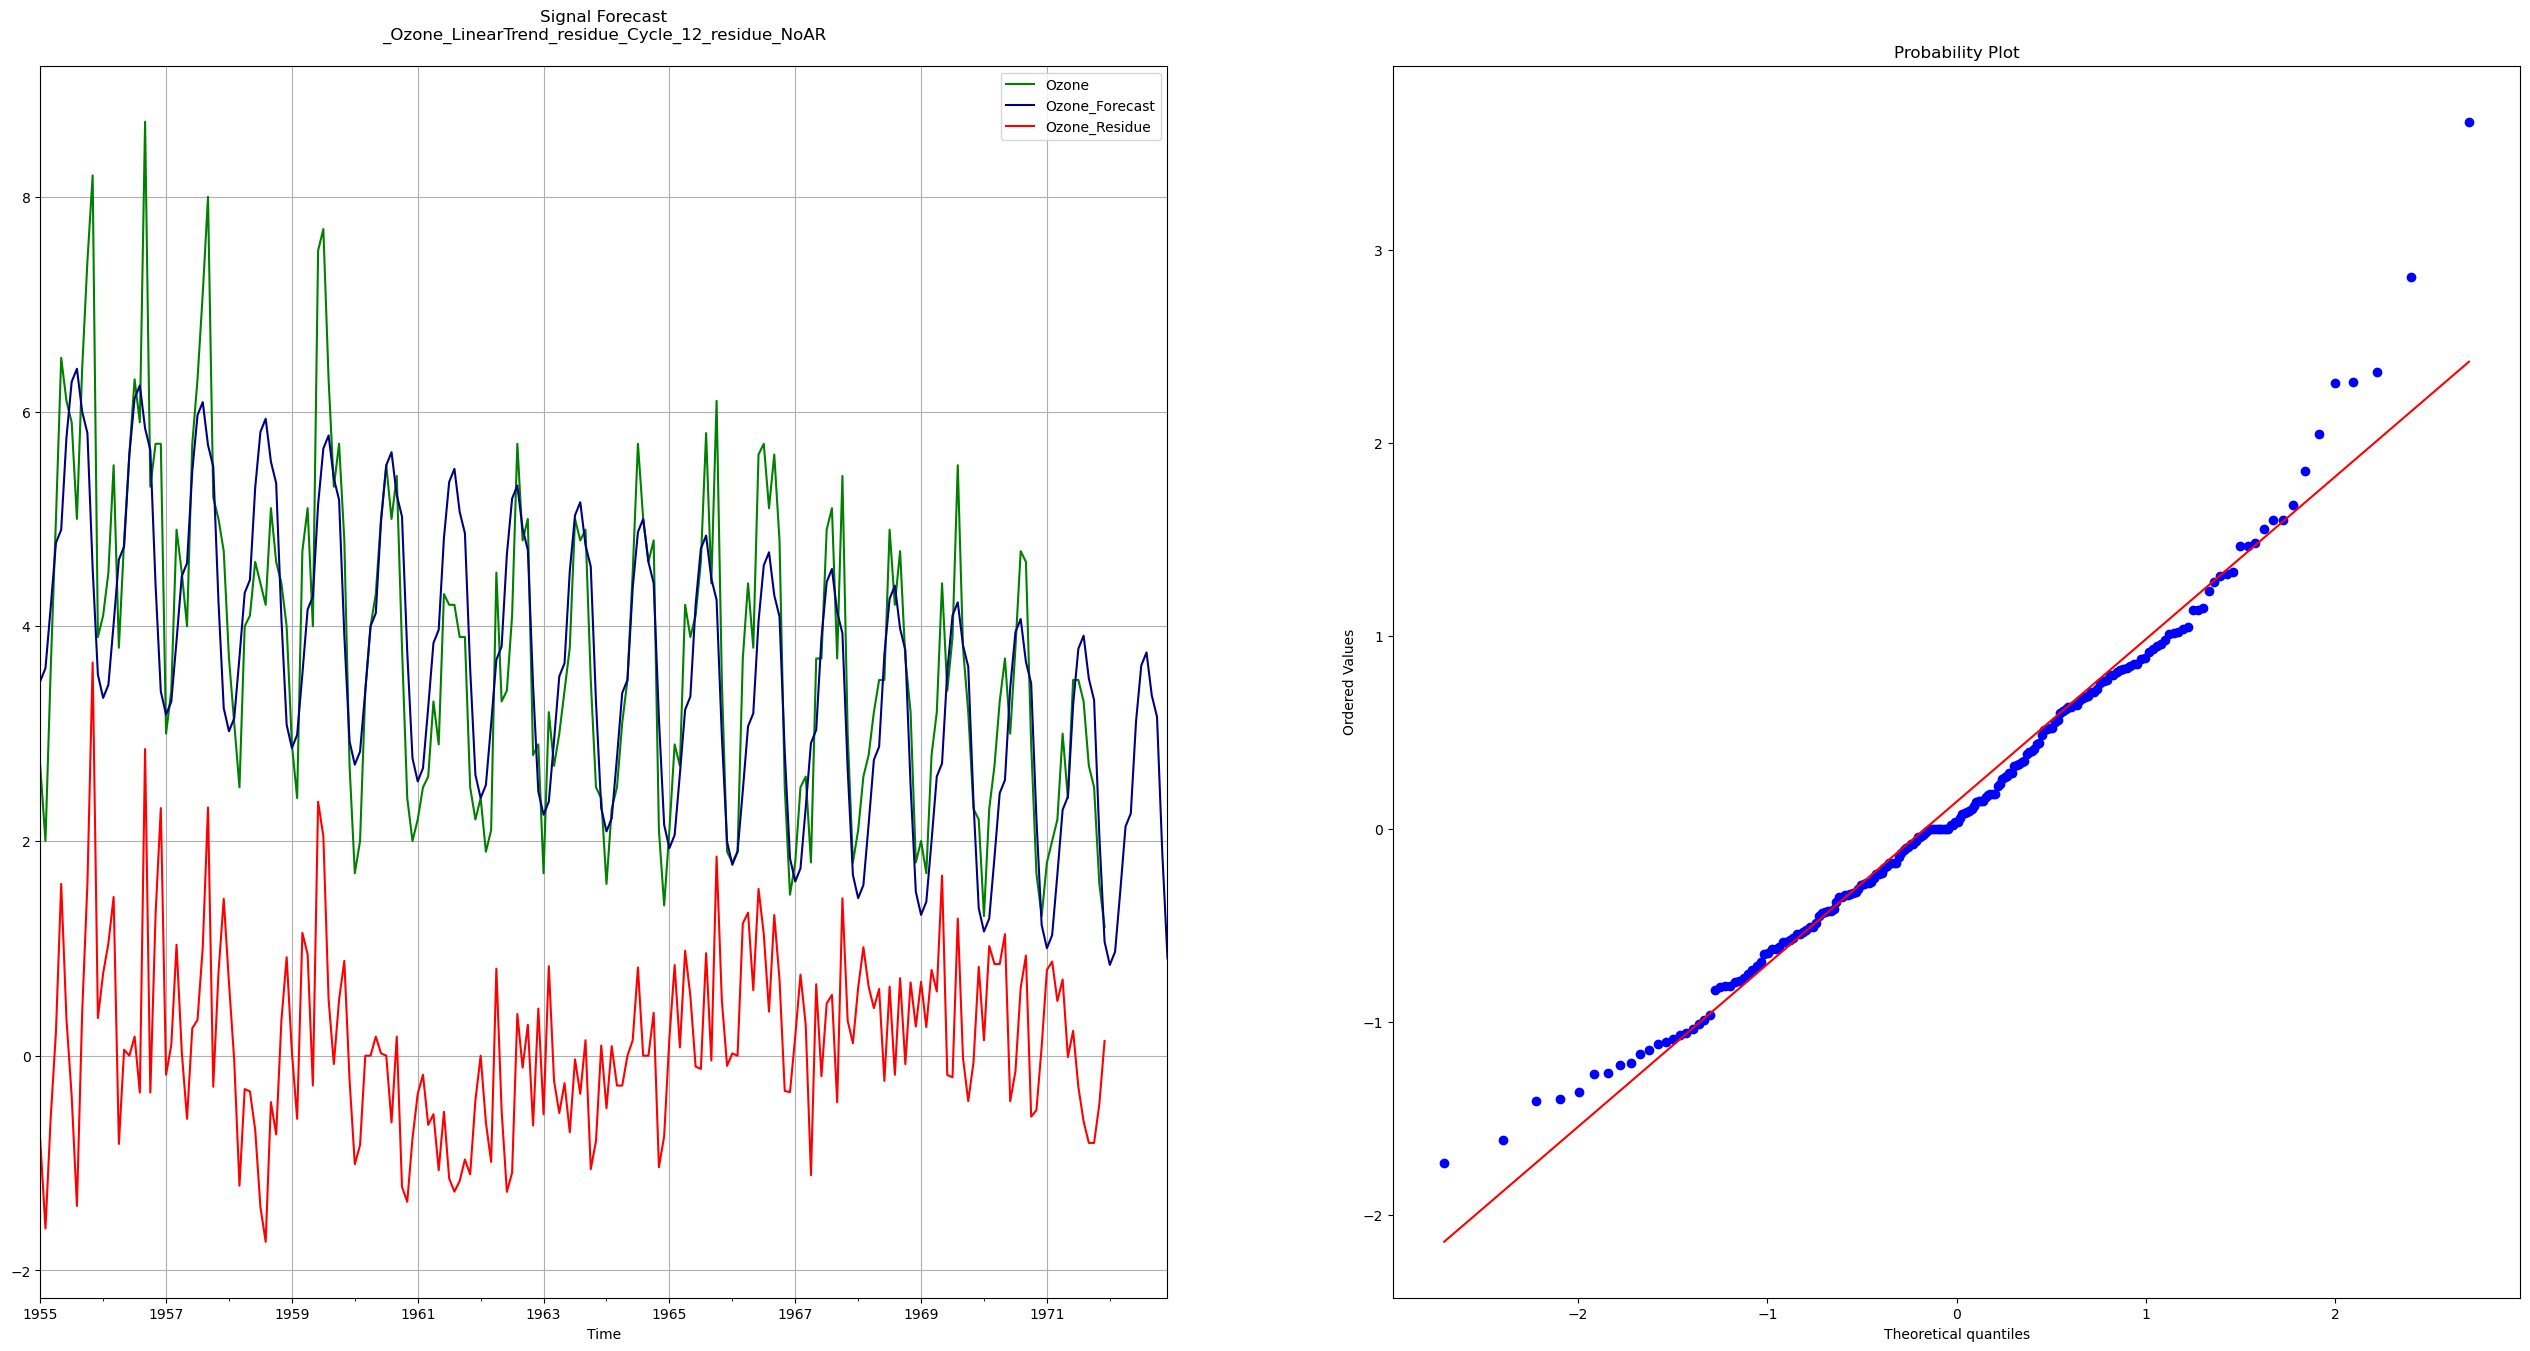

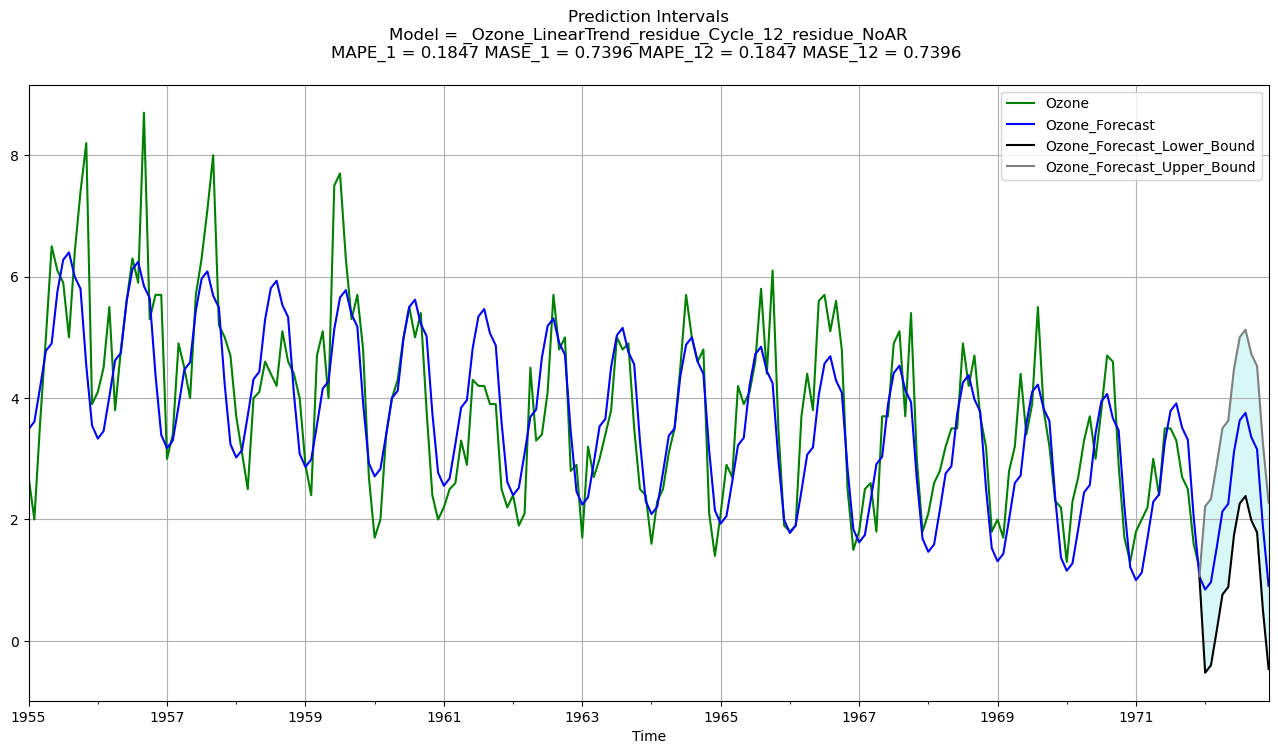

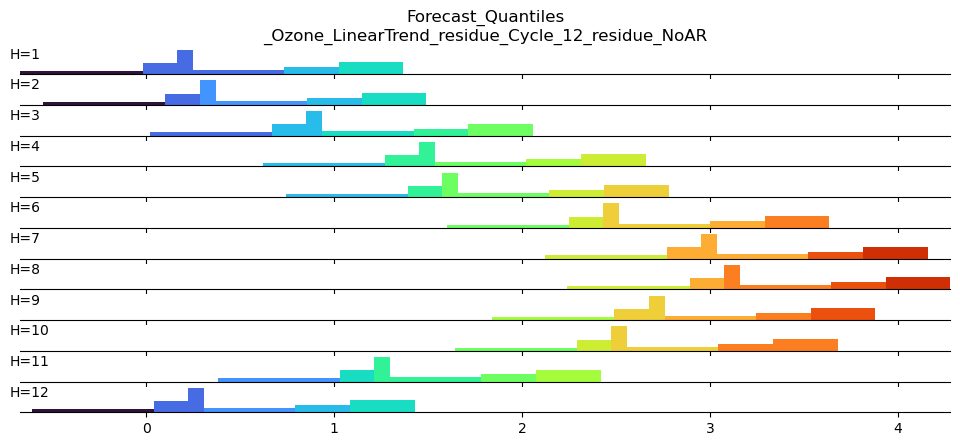

In [5]:
lEngine.mOptions.mModelSelection_Criterion = 'MASE'
lEngine.train(df , b1.mTimeVar , b1.mSignalVar, b1.mHorizon);
lEngine.getModelInfo();
print(lEngine.mSignalDecomposition.mModelShortListBySignal[b1.mSignalVar].head());
lEngine.standardPlots()

In [6]:
dfapp_in = df.copy();
dfapp_in.tail()

#H = 12
dfapp_out = lEngine.forecast(dfapp_in, b1.mHorizon);
#dfapp_out.to_csv("outputs/ozone_apply_out.csv")
dfapp_out.tail(2 * b1.mHorizon)


INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.195


,Time,Ozone,row_number,Time_Normalized,Ozone_scaled,_Ozone,_Ozone_LinearTrend,_Ozone_LinearTrend_residue,cycle_internal,_Ozone_LinearTrend_residue_Cycle_12,...,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound,Ozone_Forecast_Quantile_2,Ozone_Forecast_Quantile_18,Ozone_Forecast_Quantile_34,Ozone_Forecast_Quantile_50,Ozone_Forecast_Quantile_66,Ozone_Forecast_Quantile_82,Ozone_Forecast_Quantile_98
192,1971-01-01,1.8,192,1.263294,0.080000,0.080000,0.187523,-0.107523,0,-0.214023,...,0.798748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1971-02-01,2.0,193,1.269996,0.106667,0.106667,0.185764,-0.079098,1,-0.196036,...,0.877035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,1971-03-01,2.2,194,1.276048,0.133333,0.133333,0.184175,-0.050842,2,-0.118761,...,0.509392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,1971-04-01,3.0,195,1.282750,0.240000,0.240000,0.182417,0.057583,3,-0.037002,...,0.709392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,1971-05-01,2.4,196,1.289235,0.160000,0.160000,0.180714,-0.020714,4,-0.019072,...,-0.012321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,1971-06-01,3.5,197,1.295936,0.306667,0.306667,0.178956,0.127711,5,0.096897,...,0.231105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,1971-07-01,3.5,198,1.302421,0.306667,0.306667,0.177253,0.129413,6,0.168161,...,-0.290608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,1971-08-01,3.3,199,1.309122,0.280000,0.280000,0.175494,0.104506,7,0.186148,...,-0.612321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1971-09-01,2.7,200,1.315824,0.200000,0.200000,0.173736,0.026264,8,0.134574,...,-0.812321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,1971-10-01,2.5,201,1.322309,0.173333,0.173333,0.172033,0.001300,9,0.109664,...,-0.812734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(lEngine.to_json())

{
    "Ozone": {
        "Complexity": {
            "AR": "S",
            "Cycle": "S",
            "Decomposition": "S",
            "Transformation": "S",
            "Trend": "S"
        },
        "Dataset": {
            "Signal": "Ozone",
            "Time": {
                "Horizon": 12,
                "TimeDelta": "<DateOffset: months=1>",
                "TimeMax": "1971-12-01 00:00:00",
                "TimeMin": "1955-01-01 00:00:00",
                "TimeVariable": "Time"
            },
            "Training_Signal_Length": 204
        },
        "Model": {
            "AR_Model": "NoAR",
            "Best_Decomposition": "_Ozone_LinearTrend_residue_Cycle_12_residue_NoAR",
            "Cycle": "Cycle_12",
            "Signal_Decomposition_Type": "T+S+R",
            "Signal_Transoformation": "NoTransf",
            "Trend": "LinearTrend"
        },
        "Model_Performance": {
            "1": {
                "AUC": 0.595,
                "DiffSMAPE": 0.204,
      